<a href="https://colab.research.google.com/github/PrinscaK/Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/training_data.csv")

In [ ]:
input_data = data[['Vds','Vgs']]
target_data = data[['Id']]

In [ ]:
# Load SPICE simulation data (replace with your data loading code)
scaler_input = MinMaxScaler()
scaler_output = MinMaxScaler()
input_data_normalized = scaler_input.fit_transform(input_data)
target_data_normalized = scaler_output.fit_transform(target_data)

X_train, X_test, y_train, y_test = train_test_split(input_data_normalized, target_data_normalized, test_size=0.2, random_state=42)

# Normalize input and output data
# Normalize the input features



In [ ]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
507/507 [==============================] - 2s 2ms/step - loss: 0.0100 - val_loss: 9.0262e-04
Epoch 2/10
507/507 [==============================] - 1s 2ms/step - loss: 3.5826e-04 - val_loss: 1.6768e-04
Epoch 3/10
507/507 [==============================] - 1s 2ms/step - loss: 9.2218e-05 - val_loss: 7.3990e-05
Epoch 4/10
507/507 [==============================] - 1s 2ms/step - loss: 4.1881e-05 - val_loss: 2.9362e-05
Epoch 5/10
507/507 [==============================] - 1s 2ms/step - loss: 2.8322e-05 - val_loss: 2.2784e-05
Epoch 6/10
507/507 [==============================] - 1s 3ms/step - loss: 2.1962e-05 - val_loss: 1.8070e-05
Epoch 7/10
507/507 [==============================] - 1s 2ms/step - loss: 1.8358e-05 - val_loss: 2.5301e-05
Epoch 8/10
507/507 [==============================] - 1s 2ms/step - loss: 1.5793e-05 - val_loss: 1.4059e-05
Epoch 9/10
507/507 [==============================] - 1s 2ms/step - loss: 1.4607e-05 - val_loss: 2.0494e-05
Epoch 10/10
507/507 [===========

In [ ]:
# Evaluate the model
score= model.evaluate(X_test, y_test)
print(f'Test Loss: {score}')

pred = model.predict(X_test)


159/159 [==============================] - 0s 1ms/step - loss: 5.5950e-06
Test Loss: 5.59499358132598e-06
159/159 [==============================] - 0s 1ms/step


{'loss': [0.010039040818810463,
  0.00035826049861498177,
  9.221820801030844e-05,
  4.1881205106619745e-05,
  2.8321865102043375e-05,
  2.1962285245535895e-05,
  1.835767579905223e-05,
  1.579261697770562e-05,
  1.4606780496251304e-05,
  2.19080138776917e-05],
 'val_loss': [0.000902622239664197,
  0.00016767505439929664,
  7.399012974929065e-05,
  2.936187775048893e-05,
  2.2784366592532024e-05,
  1.8070180885843e-05,
  2.5301313144154847e-05,
  1.4058779925107956e-05,
  2.049368413281627e-05,
  6.099500751588494e-06]}

In [ ]:
import matplotlib.pyplot as plt


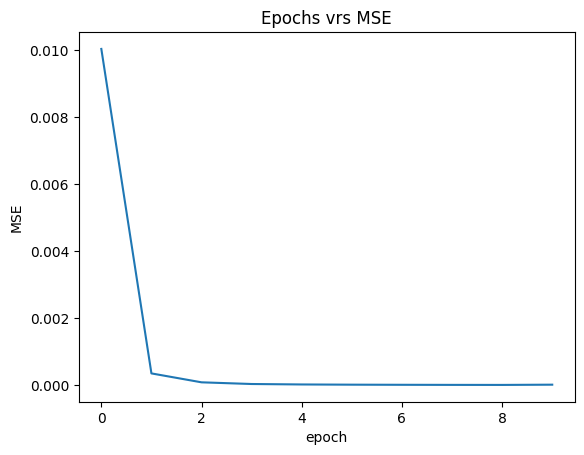

In [ ]:
epochs = history.epoch
loss = history.history['loss']
plt.plot(epochs,loss)
plt.title("Epochs vrs MSE")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.show()

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/your_model.h5')  # Replace 'your_model.h5' with your desired filename

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
